# Tracking Momentum Strategies for Big Tech that have shown massive growth on Sep 10, 2025

In [1]:
# compute returns 
import yfinance as yf 
import numpy as np

data = yf.download(['ORCL','NVDA','AVGO','MSFT', 'ARM', 'VRT'],'2025-1-1', auto_adjust=False)
ret = data['Adj Close'] / data['Adj Close'].shift() - 1
ret

[*********************100%***********************]  6 of 6 completed


Ticker,ARM,AVGO,MSFT,NVDA,ORCL,VRT
Date,,,,,,
2025-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-03,0.100468,0.002457,0.011396,0.044538,0.001747,0.062299
2025-01-06,0.044868,0.016599,0.010629,0.034332,-0.003788,0.066921
2025-01-07,-0.020555,-0.032867,-0.012808,-0.062170,-0.022089,-0.025656
2025-01-08,0.005679,0.002930,0.005185,-0.000214,0.006851,-0.010487
...,...,...,...,...,...,...
2025-09-08,0.007020,0.032130,0.006465,0.007724,0.024399,-0.017581
2025-09-09,0.011930,-0.025980,0.000422,0.014556,0.012705,0.030865
2025-09-10,0.094744,0.097722,0.003932,0.038475,0.359488,0.088868


In [2]:
# compute portfolios and strategy returns
port = np.sqrt(10)*(ret.rolling(10,min_periods=1).mean() - ret.rolling(365,min_periods=10).mean()) 
port = port / ret.rolling(365,min_periods=10).std()
port = np.tanh(port)
strat_ret = port.shift()*ret 

<Axes: title={'center': 'Portfolio Returns'}, xlabel='Date'>

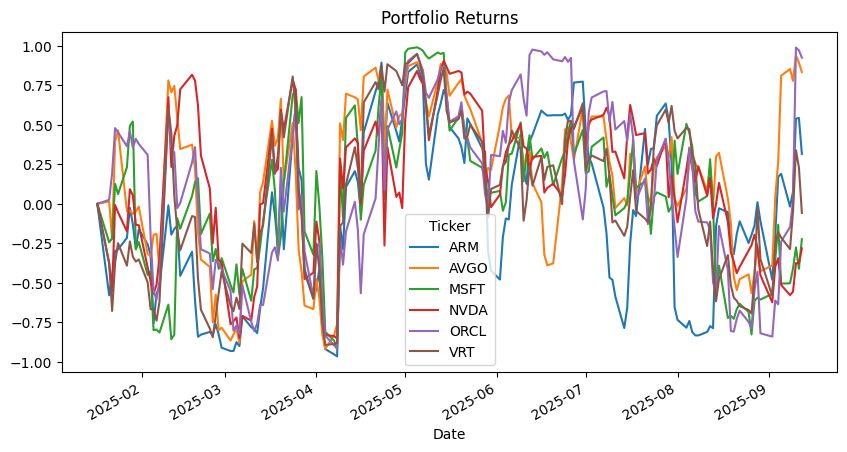

In [3]:
port.plot(figsize=(10,5), title='Portfolio Returns')

<Axes: title={'center': 'Strategy Returns'}, xlabel='Date'>

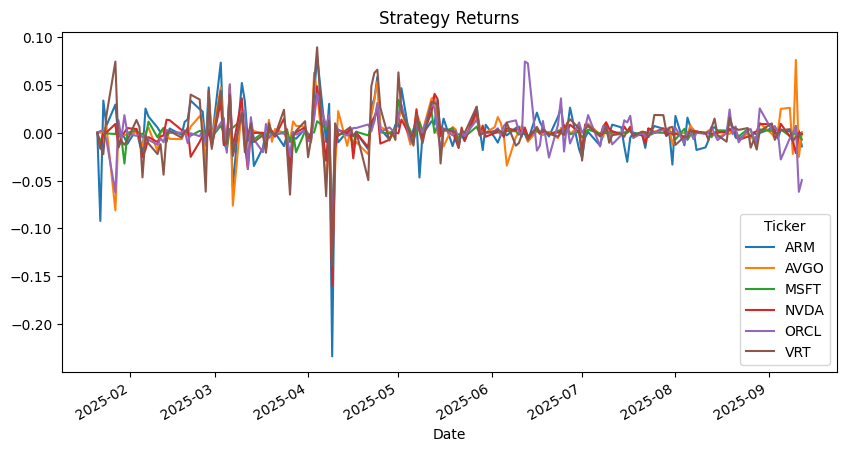

In [4]:
strat_ret.plot(figsize=(10,5), title='Strategy Returns')

In [5]:
# strategy sharpes
strat_ret.mean()/strat_ret.std()*np.sqrt(365)

Ticker
ARM     0.450327
AVGO    0.278762
MSFT   -0.199391
NVDA   -0.740652
ORCL    0.805623
VRT     0.552215
dtype: float64

<Axes: xlabel='Date'>

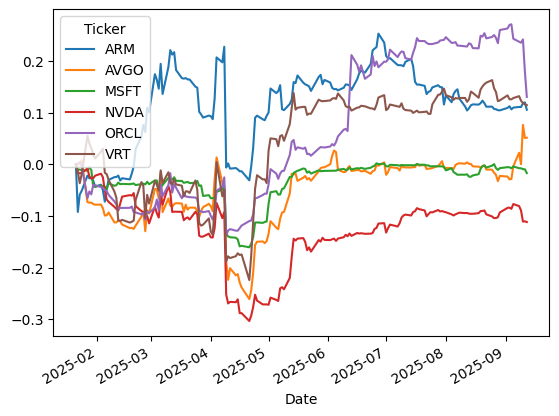

In [6]:
# plot strategy cum returns
strat_ret.cumsum().plot()